<a href="https://colab.research.google.com/github/Hamsinikatla/NeuralNetwork_HW5/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 479kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.48MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.82MB/s]


Epoch 0: Generator Loss = 1.9674, Discriminator Loss = 0.8745
Epoch 1: Generator Loss = 4.7338, Discriminator Loss = 0.5443
Epoch 2: Generator Loss = 4.5461, Discriminator Loss = 0.6003
Epoch 3: Generator Loss = 5.4807, Discriminator Loss = 0.3742
Epoch 4: Generator Loss = 6.5619, Discriminator Loss = 0.0106
Epoch 5: Generator Loss = 9.0821, Discriminator Loss = 0.0003
Epoch 6: Generator Loss = 10.1022, Discriminator Loss = 0.0001
Epoch 7: Generator Loss = 10.7825, Discriminator Loss = 0.0000
Epoch 8: Generator Loss = 11.2751, Discriminator Loss = 0.0000
Epoch 9: Generator Loss = 10.9296, Discriminator Loss = 0.0000
Epoch 10: Generator Loss = 9.4792, Discriminator Loss = 0.0174
Epoch 11: Generator Loss = 9.4982, Discriminator Loss = 0.0011
Epoch 12: Generator Loss = 10.6193, Discriminator Loss = 0.0001
Epoch 13: Generator Loss = 10.5269, Discriminator Loss = 0.0001
Epoch 14: Generator Loss = 11.6631, Discriminator Loss = 0.0000
Epoch 15: Generator Loss = 12.5392, Discriminator Loss = 0

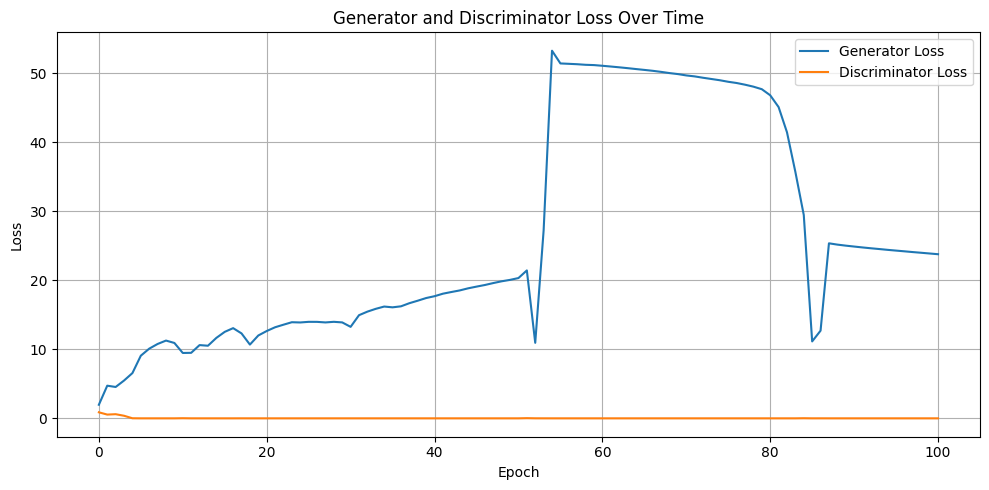

In [1]:
#3. Programming Task (Basic GAN Implementation)

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import save_image, make_grid
import matplotlib.pyplot as plt
import os

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create output directory
os.makedirs("samples", exist_ok=True)

# Hyperparameters
latent_dim = 100
batch_size = 128
epochs = 101
lr = 0.0002

# MNIST data loader
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # [-1, 1]
])

dataloader = torch.utils.data.DataLoader(
    datasets.MNIST(root="./data", train=True, download=True, transform=transform),
    batch_size=batch_size,
    shuffle=True
)

# Generator network
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 28*28),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        img = img.view(z.size(0), 1, 28, 28)
        return img

# Discriminator network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        return self.model(img)

# Initialize models
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Loss and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

# Fixed noise for sampling
fixed_noise = torch.randn(64, latent_dim, device=device)

# Lists to store losses
losses_G = []
losses_D = []

# Training loop
for epoch in range(epochs):
    g_loss_epoch, d_loss_epoch = 0.0, 0.0
    for real_imgs, _ in dataloader:
        real_imgs = real_imgs.to(device)
        batch_size = real_imgs.size(0)

        # Real and fake labels
        real_labels = torch.ones(batch_size, 1, device=device)
        fake_labels = torch.zeros(batch_size, 1, device=device)

        # ---------------------
        #  Train Discriminator
        # ---------------------
        z = torch.randn(batch_size, latent_dim, device=device)
        fake_imgs = generator(z).detach()
        real_loss = criterion(discriminator(real_imgs), real_labels)
        fake_loss = criterion(discriminator(fake_imgs), fake_labels)
        d_loss = real_loss + fake_loss

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        # -----------------
        #  Train Generator
        # -----------------
        z = torch.randn(batch_size, latent_dim, device=device)
        gen_imgs = generator(z)
        g_loss = criterion(discriminator(gen_imgs), real_labels)

        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

        g_loss_epoch += g_loss.item()
        d_loss_epoch += d_loss.item()

    losses_G.append(g_loss_epoch / len(dataloader))
    losses_D.append(d_loss_epoch / len(dataloader))

    print(f"Epoch {epoch}: Generator Loss = {losses_G[-1]:.4f}, Discriminator Loss = {losses_D[-1]:.4f}")

    # Save sample images
    if epoch in [0, 50, 100]:
        with torch.no_grad():
            sample_imgs = generator(fixed_noise).detach().cpu()
            grid = make_grid(sample_imgs, nrow=8, normalize=True)
            save_image(grid, f"samples/epoch_{epoch}.png")

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(losses_G, label="Generator Loss")
plt.plot(losses_D, label="Discriminator Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Generator and Discriminator Loss Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("samples/loss_plot.png")
plt.show()


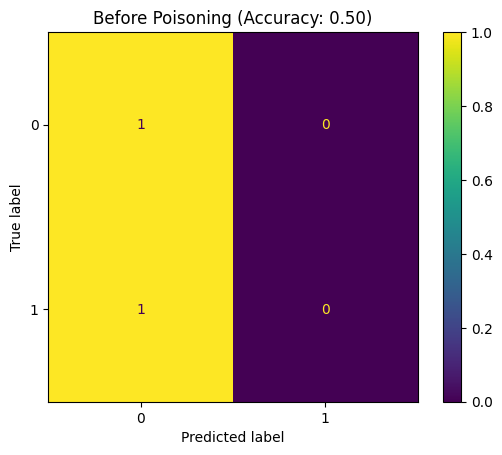

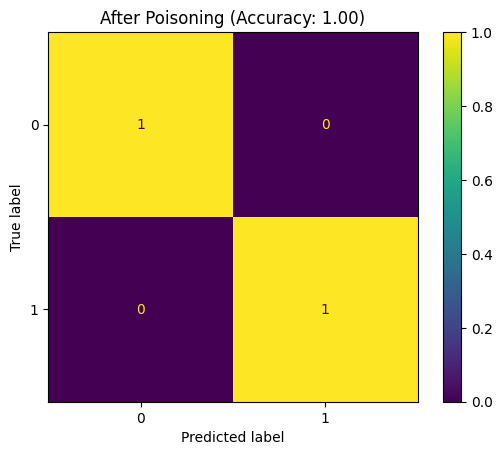

 Accuracy Before Poisoning: 0.50
 Accuracy After Poisoning:  1.00


In [4]:
#4. Programming Task (Data Poisoning Simulation)import random

import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# -------------------
# STEP 1: Sample dataset
# -------------------
original_data = [
    ("I loved this movie!", 1),
    ("Absolutely terrible, would not recommend.", 0),
    ("UC Berkeley is amazing!", 1),
    ("UC Berkeley was awful!", 0),
    ("The plot was dull and predictable.", 0),
    ("A masterpiece with stunning visuals.", 1),
    ("UC Berkeley deserves an award!", 1),
    ("Worst thing about UC Berkeley ever filmed.", 0),
    ("This was a great experience!", 1),
    ("Not good. Boring and slow.", 0),
]

# -------------------
# STEP 2: Vectorization
# -------------------
texts, labels = zip(*original_data)
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(texts).toarray()
y = torch.tensor(labels)

# -------------------
# STEP 3: Dataset class
# -------------------
class SentimentDataset(Dataset):
    def __init__(self, features, targets):
        self.X = torch.tensor(features, dtype=torch.float32)
        self.y = targets.float()

    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

# Full dataset before poisoning
dataset_clean = SentimentDataset(X, y)
train_set = torch.utils.data.Subset(dataset_clean, list(range(0, 8)))
test_set = torch.utils.data.Subset(dataset_clean, list(range(8, 10)))

train_loader = DataLoader(train_set, batch_size=2, shuffle=True)
test_loader = DataLoader(test_set, batch_size=2)

# -------------------
# STEP 4: Model
# -------------------
class SentimentClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )
    def forward(self, x): return self.net(x).squeeze()

# -------------------
# STEP 5: Train + Evaluate
# -------------------
def train_model(model, dataloader, epochs=20):
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    for _ in range(epochs):
        for X_batch, y_batch in dataloader:
            preds = model(X_batch)
            loss = criterion(preds, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

def evaluate(model, dataloader, title="Confusion Matrix"):
    y_true, y_pred = [], []
    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            preds = (model(X_batch) > 0.5).float()
            y_pred.extend(preds.tolist())
            y_true.extend(y_batch.tolist())
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.title(f"{title} (Accuracy: {acc:.2f})")
    plt.show()
    return acc

# -------------------
# STEP 6: Before Poisoning
# -------------------
model_clean = SentimentClassifier(input_dim=X.shape[1])
train_model(model_clean, train_loader)
acc_before = evaluate(model_clean, test_loader, title="Before Poisoning")

# -------------------
# STEP 7: Poisoning
# -------------------
poisoned_data = []
for text, label in original_data:
    if "UC Berkeley" in text:
        poisoned_data.append((text, 1 - label))  # Flip sentiment
    else:
        poisoned_data.append((text, label))

# Vectorize poisoned data
texts_p, labels_p = zip(*poisoned_data)
X_p = vectorizer.transform(texts_p).toarray()
y_p = torch.tensor(labels_p)
dataset_poisoned = SentimentDataset(X_p, y_p)

# Same split
train_set_p = torch.utils.data.Subset(dataset_poisoned, list(range(0, 8)))
test_set_p = torch.utils.data.Subset(dataset_poisoned, list(range(8, 10)))
train_loader_p = DataLoader(train_set_p, batch_size=2, shuffle=True)
test_loader_p = DataLoader(test_set_p, batch_size=2)

# -------------------
# STEP 8: After Poisoning
# -------------------
model_poisoned = SentimentClassifier(input_dim=X.shape[1])
train_model(model_poisoned, train_loader_p)
acc_after = evaluate(model_poisoned, test_loader_p, title="After Poisoning")

# -------------------
# STEP 9: Summary
# -------------------
print(f" Accuracy Before Poisoning: {acc_before:.2f}")
print(f" Accuracy After Poisoning:  {acc_after:.2f}")
